In [1]:
!wget https://raw.githubusercontent.com/Jcharis/data-science-projects/master/end2end-datascience_project_Udemy_dataset/data/udemy_courses.csv

--2022-10-27 08:18:13--  https://raw.githubusercontent.com/Jcharis/data-science-projects/master/end2end-datascience_project_Udemy_dataset/data/udemy_courses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 709457 (693K) [text/plain]
Saving to: ‘udemy_courses.csv’

udemy_courses.csv   100%[===================>] 692.83K  --.-KB/s    in 0.04s   

2022-10-27 08:18:13 (15.1 MB/s) - ‘udemy_courses.csv’ saved [709457/709457]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neattext.functions as nfx

In [3]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.3 MB/s 


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
df = pd.read_csv('udemy_courses.csv')

In [7]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [8]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.683000e+03,3683.000000,3683.000000,3683.000000
mean,6.764546e+05,3193.371165,156.448004,40.062178
std,3.437217e+05,9498.231406,935.078241,50.366788
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.077270e+05,110.000000,4.000000,15.000000
50%,6.882440e+05,911.000000,18.000000,25.000000
75%,9.617290e+05,2537.500000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [9]:
df["subject"].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [21]:
## Clean text
df["course_title_cleaned"] = df["course_title"].apply(nfx.clean_text)
df["course_title_cleaned"] = df["course_title_cleaned"].apply(nfx.remove_special_characters)

In [11]:
df[["course_title", "course_title_cleaned"]]

,course_title,course_title_cleaned
0,Ultimate Investment Banking Course,ultimate investment banking course
1,Complete GST Course & Certification - Grow You...,complete gst course & certification - grow pra...
2,Financial Modeling for Business Analysts and C...,financial modeling business analysts consultants
3,Beginner to Pro - Financial Analysis in Excel ...,beginner pro - financial analysis excel 2017
4,How To Maximize Your Profits Trading Options,maximize profits trading options
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,learn jquery scratch - master javascript library
3679,How To Design A WordPress Website With No Codi...,design wordpress website coding
3680,Learn and Build using Polymer,learn build polymer
3681,CSS Animations: Create Amazing Effects on Your...,css animations: create amazing effects website


In [22]:
# Vect text
count_vect = CountVectorizer()
cv_matrix = count_vect.fit_transform(df["course_title_cleaned"])

In [23]:
cv_matrix.shape

(3683, 3564)

In [24]:
cv_words_df = pd.DataFrame(cv_matrix.todense(), columns=count_vect.get_feature_names_out())

In [25]:
cv_words_df.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
cv_words_df.columns

Index(['000005', '001', '01', '02', '10', '100', '101', '101master', '102',
       '10k',
       ...
       'zend', 'zero', 'zerotohero', 'zf2', 'zinsen', 'zoho', 'zombie', 'zu',
       'zuhause', 'zur'],
      dtype='object', length=3564)

In [28]:
sim_matrix = cosine_similarity(cv_matrix)

In [29]:
sim_matrix.shape

(3683, 3683)

In [31]:
sim_matrix[0:10, 0:10].shape

(10, 10)

In [32]:
import seaborn as sns

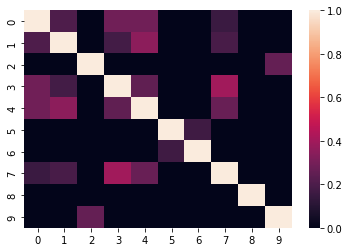

In [34]:
sns.heatmap(sim_matrix[10:20, 10:20])

In [37]:
course_indices = pd.Series(df.index, index=df["course_title"]).drop_duplicates()

In [38]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [39]:
sim_matrix[7]

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
def recommend_course(title, k=10):
    # Get index
    idx = course_indices[title]
    # Search inside sim_matrix
    scores = list(enumerate(sim_matrix[idx]))
    scores_sorted = sorted(scores, key=lambda x: x[1], reverse=True)
    # rec
    selected_course_indices = [i[0] for i in scores_sorted[1:]]
    selected_course_scores = [i[1] for i in scores_sorted[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df["similarity_score"] = selected_course_scores
    return rec_df.head(k)

In [44]:
recommend_course('Ultimate Investment Banking Course')

,course_title,similarity_score
39,The Complete Investment Banking Course 2017,0.670820
3479,The Ultimate jQuery Course,0.577350
242,Advanced Accounting for Investment Banking,0.500000
419,The Investment Banking Recruitment Series,0.500000
2719,The Ultimate Web Development Course,0.500000
2807,Ultimate WordPress Plugin Course,0.500000
659,Financial Accounting - The Ultimate Beginner C...,0.447214
1073,Managerial Accounting - The Ultimate Beginner ...,0.447214
1215,The Ultimate Drawing Course - Beginner to Adva...,0.447214
2648,The Ultimate Vue JS 2 Developers Course,0.447214


In [45]:
np.save('sim_matrix.npy', sim_matrix)

In [46]:
np.save('course_indices.npy', course_indices)